In [462]:
import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import PolynomialFeatures

#New! for Legendre
from scipy.special import legendre
from sklearn.metrics import r2_score #for r-squared


import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib import rc

# Set default font to 'Times New Roman'
rc('font', family='Times New Roman')

## Data Pre Processing and Visualization

### Load Data

In [4]:
path = '/Users/Farid/Downloads/woolsey-selected/'

sensor_interest_1 = pd.read_csv(path+'sensor_interest_1 737433.txt')
print('sensor_interest_1: ', sensor_interest_1.shape)

sensor_interest_2 = pd.read_csv(path+'sensor_interest_2 764848.txt')
print('sensor_interest_2: ', sensor_interest_2.shape)

sensor_interest_3 = pd.read_csv(path+'sensor_interest_3 764632.txt')
print('sensor_interest_3: ', sensor_interest_3.shape)

sensor_interest_1:  (9216, 38)
sensor_interest_2:  (9216, 38)
sensor_interest_3:  (9216, 38)


### Visualize the Data

In [5]:
from datetime import datetime, timedelta

# Define the starting date
start_date = datetime(2018, 10, 1)  # start from 1st October 2023

# Define the number of days
n_days = 3

# Create the list of days
days = [(start_date + timedelta(days=i)).strftime('%m/%d') for i in range(n_days)]
print('days: ', days)


days:  ['10/01', '10/02', '10/03']


/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_30641/1874303559.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])
/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_30641/1874303559.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])
/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_30641/1874303559.py:29: SettingWithCopyWarning: 
A value is

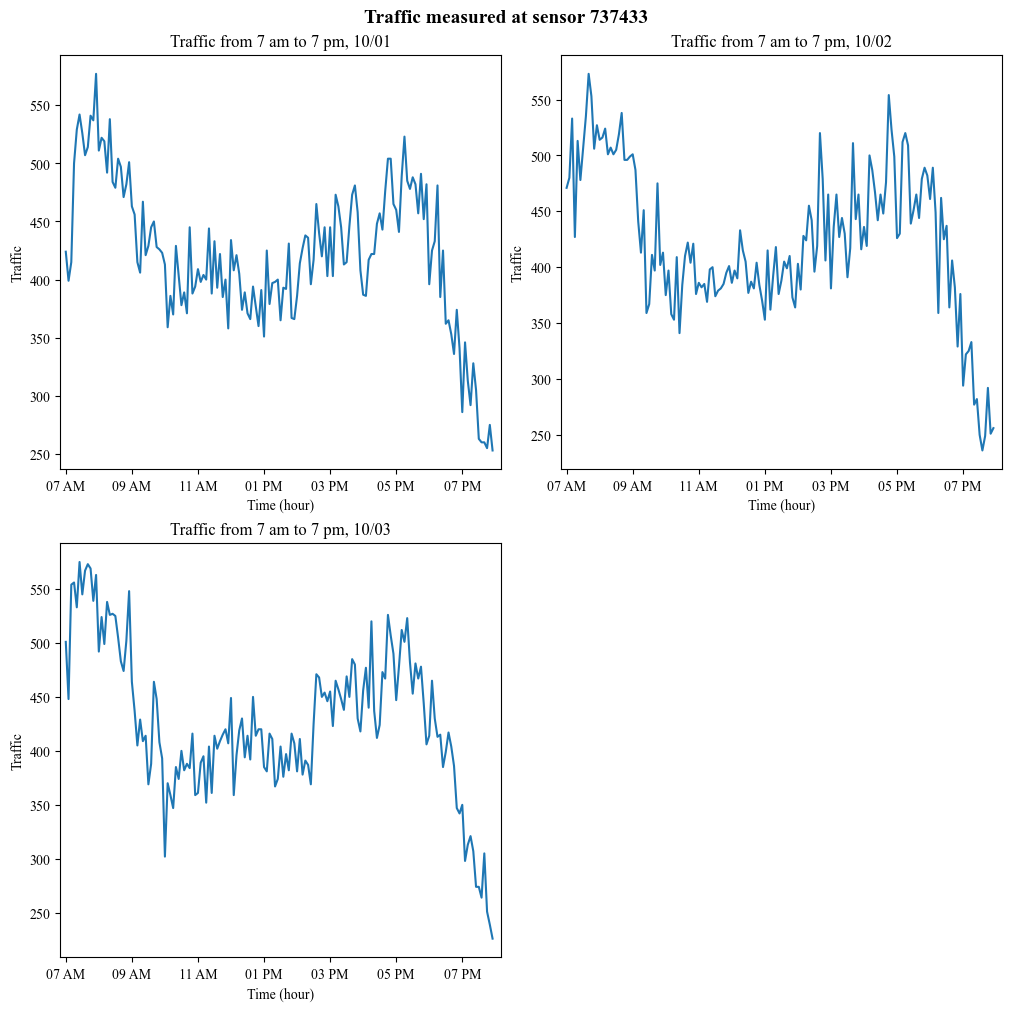

/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_30641/1874303559.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])
/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_30641/1874303559.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])
/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_30641/1874303559.py:76: SettingWithCopyWarning: 
A value is

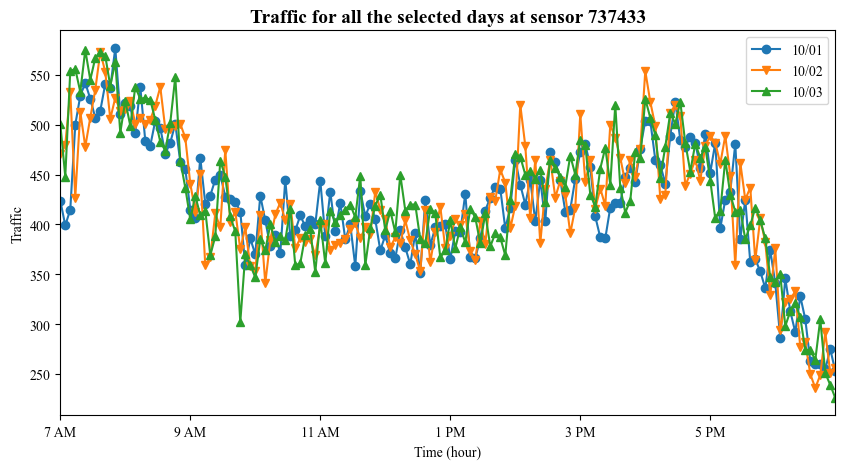

In [7]:

################################################################################################
sensor_interest = sensor_interest_1
sensor_id = 737433
################################################################################################


#####   Subplots
#####


# Calculate number of rows required for subplots
n = len(days)
nrows = n // 2 if n % 2 == 0 else n // 2 + 1

# Initialize figure and axes for subplots
fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(10, nrows*5), constrained_layout=True)
axs = axs.flatten()  # flatten array to make indexing easier

fig.suptitle(f'Traffic measured at sensor {sensor_id}', fontsize=14, weight='bold')

for i, day in enumerate(days):
    ax = axs[i]  # current subplot

    time_series_data = sensor_interest[sensor_interest['Time'].str.startswith(day)]
    time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])

    # Filter out data outside of 7 AM to 7 PM
    time_series_data = time_series_data[(time_series_data['Time'].dt.hour >= 7) & (time_series_data['Time'].dt.hour <= 19)]

    # y values
    traffic = time_series_data['10']

    # x values - use 'Time' values
    time = time_series_data['Time']

    # Create scatter plot
    ax.plot(time, traffic)

    # Set x-axis format and locator
    hours = mdates.DateFormatter('%I %p')
    hour_locator = mdates.HourLocator(interval=2)  # put a tick on every 2 hours
    ax.xaxis.set_major_locator(hour_locator)
    ax.xaxis.set_major_formatter(hours)

    # Adjust x limits to start slightly before 7 AM and end at 7 PM
    start_time = time.min().replace(hour=6, minute=50, second=0)  # 10 minutes before 7 AM
    end_time = time.max().replace(hour=20, minute=10, second=0)
    ax.set_xlim(start_time, end_time)

    # Set axis titles
    ax.set_xlabel('Time (hour)')
    ax.set_ylabel('Traffic')
    ax.set_title('Traffic from 7 am to 7 pm, '+day)

# If there are more subplots than days (i.e. an even number of subplots), remove the extra one
if len(days) % 2 != 0:
    fig.delaxes(axs[-1])  

plt.show()

#####   Additional 1-plot
#####


# Define a list of markers
markers = ['o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', '.', ',']

fig, ax = plt.subplots(figsize=(10, 5))

for i, day in enumerate(days):
    time_series_data = sensor_interest[sensor_interest['Time'].str.startswith(day)]
    time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])

    # Filter out data outside of 7 AM to 7 PM
    time_series_data = time_series_data[(time_series_data['Time'].dt.hour >= 7) & (time_series_data['Time'].dt.hour <= 19)]

    # y values
    traffic = time_series_data['10']

    # Plot the data for all series with different markers for each day
    if n_days < 10:
        ax.plot(np.arange(len(traffic)), traffic, label=day, marker=markers[i%len(markers)])
    else:
        ax.plot(np.arange(len(traffic)), traffic, label=day)  # Use modulus to prevent out of index errors

# Set x-axis ticks and labels
x_ticks = np.linspace(0, len(traffic), 7)  # generate 7 evenly spaced x-axis locations
time_labels = ['7 AM', '9 AM', '11 AM', '1 PM', '3 PM', '5 PM', '7 PM']  # corresponding time labels
ax.set_xticks(x_ticks)
ax.set_xticklabels(time_labels)

# Adjust x limits to start slightly before 7 AM and end at 7 PM
start_time = np.arange(len(traffic)).min()  # 10 minutes before 7 AM
end_time = np.arange(len(traffic)).max()  # 10 minutes after 7 PM
ax.set_xlim(start_time, end_time)

# Set labels and title for the combined plot
ax.set_xlabel('Time (hour)')
ax.set_ylabel('Traffic')
ax.set_title(f'Traffic for all the selected days at sensor {sensor_id}', fontsize=14, weight='bold')
ax.legend()

plt.show()

/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_30641/1469223246.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])


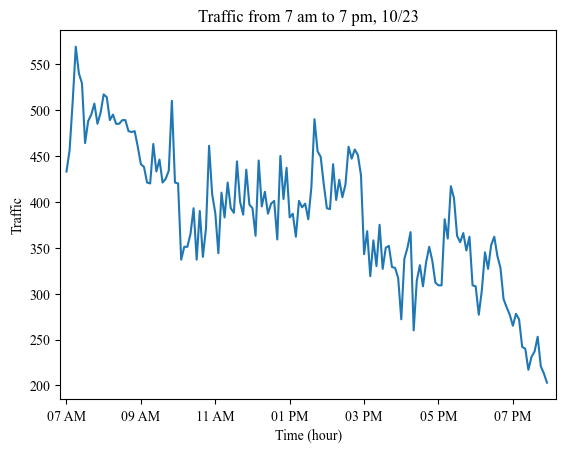

In [463]:
day = "10/23"
################################################################################################


time_series_data = sensor_interest[sensor_interest['Time'].str.startswith(day)]

# Ensure 'Time' column is in datetime format
time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])

# Filter out data outside of 7 AM to 7 PM
time_series_data = time_series_data[(time_series_data['Time'].dt.hour >= 7) & (time_series_data['Time'].dt.hour <= 19)]

# y values
traffic = time_series_data['10']

# x values - use 'Time' values
time = time_series_data['Time']

fig, ax = plt.subplots()

# Create scatter plot
ax.plot(time, traffic)

# Set x-axis format and locator
hours = mdates.DateFormatter('%I %p')
hour_locator = mdates.HourLocator(interval=2)  # put a tick on every 2 hours
ax.xaxis.set_major_locator(hour_locator)
ax.xaxis.set_major_formatter(hours)

# Adjust x limits to start slightly before 7 AM and end at 7 PM
start_time = time.min().replace(hour=6, minute=50, second=0)  # 10 minutes before 7 AM
end_time = time.max().replace(hour=20, minute=10, second=0)
ax.set_xlim(start_time, end_time)

# Set axis titles
ax.set_xlabel('Time (hour)')
ax.set_ylabel('Traffic')
ax.set_title('Traffic from 7 am to 7 pm, '+day)

plt.show()


## Traffic Prediction

In [9]:
def generate_multi_legendre_design_matrix_(x_initial, polynomial_order):
    if np.isscalar(x_initial):
        x_initial = np.array([[x_initial]])

    # Ensure x_initial is a 2D numpy array
    x_initial = np.atleast_2d(x_initial)
    

    # N is the number of observations,      num_vars is the number of input variables
    N, n_input_vars = x_initial.shape

    # Number of terms in the expansion for each variable (x1^0, x1^1, x1^2, ...)
    n_expansion_terms = polynomial_order + 1

    # Total number of terms in the expansion
    total_expansion_terms = n_expansion_terms ** n_input_vars

    # Initialize design matrix
    design_matrix = np.empty((N, total_expansion_terms), dtype='float64')

    # Loop over each data point
    for i in range(N):
        col_index = 0 # just a counter
        # Loop over all combinations of polynomial orders for each variable
        for terms in np.ndindex(*([n_expansion_terms]*n_input_vars)): ######## CHECK
            product = 1.0
            # Calculate the product of Legendre polynomials for this combination of terms
            for var in range(n_input_vars):
                P_j = legendre(terms[var])
                product *= P_j(x_initial[i, var])
            # Store result in the design matrix
            design_matrix[i, col_index] = product
            col_index += 1
            

    return design_matrix

In [55]:
####                                                                         ####
####                                                                         ####
#### This one goes to the parameters that do not exceed the polynomial order ####
####                                                                         ####
####                                                                         ####

import numpy as np
from numpy.polynomial.legendre import Legendre
from sklearn.preprocessing import MinMaxScaler

def generate_multi_legendre_design_matrix(x_initial, polynomial_order):
    x_initial = np.atleast_2d(x_initial)
    n_input_vars = x_initial.shape[1]
    
    # Generate multi-index for which the sum of the indices is <= polynomial_order
    indices = np.indices((polynomial_order + 1,) * n_input_vars).reshape(n_input_vars, -1)
    indices = indices[:, np.sum(indices, axis=0) <= polynomial_order]
    
    # Initialize design matrix
    design_matrix = np.empty((x_initial.shape[0], indices.shape[1]), dtype='float64')


    # Compute product of variables raised to the power of indices
    for row in range(x_initial.shape[0]):
        for col, idx in enumerate(indices.T):
            product = 1
            for var, power in enumerate(idx):
                if power != 0:
                    P_j = Legendre.basis(deg=power)
                    product *= P_j(x_initial[row, var])
                else:
                    product *= 1
            design_matrix[row, col] = product
            
    return design_matrix

In [56]:
xx = np.array([[1,2],[1,2],[1,2]])
xx

array([[1, 2],
       [1, 2],
       [1, 2]])

In [57]:

print('generate_multi_legendre_design_matrix_: ', generate_multi_legendre_design_matrix_(xx,2).shape)
generate_multi_legendre_design_matrix_(xx,2)

generate_multi_legendre_design_matrix_:  (3, 9)


array([[1. , 2. , 5.5, 1. , 2. , 5.5, 1. , 2. , 5.5],
       [1. , 2. , 5.5, 1. , 2. , 5.5, 1. , 2. , 5.5],
       [1. , 2. , 5.5, 1. , 2. , 5.5, 1. , 2. , 5.5]])

In [58]:

print('generate_multi_legendre_design_matrix: ', generate_multi_legendre_design_matrix(xx,2).shape)
generate_multi_legendre_design_matrix(xx,2)

generate_multi_legendre_design_matrix:  (3, 6)


array([[ 1. ,  1. ,  1. ,  0. ,  0. , -0.5],
       [ 1. ,  1. ,  1. ,  0. ,  0. , -0.5],
       [ 1. ,  1. ,  1. ,  0. ,  0. , -0.5]])

In [22]:
taco = 2 * np.random.rand(10, 15) - 1
generate_multi_legendre_design_matrix(taco,2).shape
print('generate_multi_legendre_design_matrix(xx,2).shape: ', generate_multi_legendre_design_matrix(taco,2).shape)
#generate_multi_legendre_design_matrix_(taco,2).shape
#print('generate_multi_legendre_design_matrix_(xx,2).shape: ', generate_multi_legendre_design_matrix_(taco,2).shape)

generate_multi_legendre_design_matrix(xx,2).shape:  (10, 136)


### Predictive Algorithm

In [239]:
def online_kaczmarz_legendre_multiple(x_initial, target_values, polynomial_order, weights=None):

    # Initialize MinMaxScaler to normalize to range [-1,1]
    #scaler = MinMaxScaler(feature_range=(-1, 1))
    # x_initial = ( x_initial - x_initial.min() ) / ( x_initial.max() - x_initial.min() )

    design_matrix = generate_multi_legendre_design_matrix(x_initial, polynomial_order)

    if weights is None:
        # initialize the weights to be the number of columns in the design matrix
        weight_predictions = np.random.rand(design_matrix.shape[1])
    else:
        weight_predictions = weights

    beta_parameter = 0

    for i in range (design_matrix.shape[0]):
        a = design_matrix[i, :]
        #a = ( a_0 - a_0.min() ) / ( a_0.max() - a_0.min() )
        
        weight_predictions = weight_predictions + ((target_values[i] - np.dot(a, weight_predictions)) / np.linalg.norm(a)**2) * a.T

        
        ################
        # weight_predictions =  (weight_predictions + a.min() ) * ( a.max() - a.min() )
        ################


        # This is for beta
        # Note: you may want to uncomment this if you want to compute beta_parameter
        # residual_errors = target_values - design_matrix @ weight_predictions
        # sse = residual_errors.T @ residual_errors
        # beta_parameter = sse / ( - polynomial_order)

    return weight_predictions, beta_parameter

###

In [159]:
60/5*12

144.0

## Sensor 737433 (traffic increases after fire)

### Load the data of the sensor of interest, and the m closest sensors.

In [360]:
## m=4

path = '/Users/Farid/Downloads/woolsey-selected/'

sensor_interest_1_ = pd.read_csv(path+'sensor_interest_1 737433.txt')
print('sensor_interest_1: ', sensor_interest_1.shape)

sensor_1_m_1_ = pd.read_csv(path+'sensor_1_m_8 772564.txt')
sensor_1_m_2_ = pd.read_csv(path+'sensor_1_m_9 775975.txt')
sensor_1_m_3_ = pd.read_csv(path+'sensor_1_m_11 775961.txt')
sensor_1_m_4_ = pd.read_csv(path+'sensor_1_m_14 775949.txt')


sensor_interest_1:  (9216, 38)


### Filter out the measurements that are outside the time intervals of interest.
We want to see the measurements from   **_7 am to 7 pm_**

In [361]:
# Ensure 'Time' column is in datetime format
sensor_interest_1_['Time'] = pd.to_datetime(sensor_interest_1_['Time'])
sensor_1_m_1_['Time'] = pd.to_datetime(sensor_1_m_1_['Time'])
sensor_1_m_2_['Time'] = pd.to_datetime(sensor_1_m_2_['Time'])
sensor_1_m_3_['Time'] = pd.to_datetime(sensor_1_m_3_['Time'])
sensor_1_m_4_['Time'] = pd.to_datetime(sensor_1_m_4_['Time'])

# Filter out data outside of 7 AM to 7 PM
sensor_interest_1 = sensor_interest_1_[(sensor_interest_1_['Time'].dt.hour >= 7) & (sensor_interest_1_['Time'].dt.hour < 19)]
sensor_1_m_1 = sensor_1_m_1_[(sensor_1_m_1_['Time'].dt.hour >= 7) & (sensor_1_m_1_['Time'].dt.hour < 19)]
sensor_1_m_2 = sensor_1_m_2_[(sensor_1_m_2_['Time'].dt.hour >= 7) & (sensor_1_m_2_['Time'].dt.hour < 19)]
sensor_1_m_3 = sensor_1_m_3_[(sensor_1_m_3_['Time'].dt.hour >= 7) & (sensor_1_m_3_['Time'].dt.hour < 19)]
sensor_1_m_4 = sensor_1_m_4_[(sensor_1_m_4_['Time'].dt.hour >= 7) & (sensor_1_m_4_['Time'].dt.hour < 19)]

# Reset the indices
sensor_interest_1 = sensor_interest_1.reset_index(drop=True)
sensor_1_m_1 = sensor_1_m_1.reset_index(drop=True)
sensor_1_m_2 = sensor_1_m_2.reset_index(drop=True)
sensor_1_m_3 = sensor_1_m_3.reset_index(drop=True)
sensor_1_m_4 = sensor_1_m_4.reset_index(drop=True)


print('sensor_1: ', sensor_interest_1.shape)
print('sensor_1_m_1: ', sensor_1_m_1.shape)
print('sensor_1_m_2: ', sensor_1_m_2.shape)
print('sensor_1_m_3: ', sensor_1_m_3.shape)
print('sensor_1_m_4: ', sensor_1_m_4.shape)

sensor_1:  (4608, 38)
sensor_1_m_1:  (4607, 38)
sensor_1_m_2:  (4608, 38)
sensor_1_m_3:  (4608, 34)
sensor_1_m_4:  (4608, 34)


### Generate the matrix as per the specifications in the paper.
Each row will have the measurements of traffic from the sensor of interest and the m-closest sensors.
- The rows will include traffic information of the t-1, t-2,..., t-r observations.
- The rows are organized by sensor, and by timestep: 
<br><br>[sensor of interest @ t-1,...,sensor of interest @ t-r, ... , m-closest sensor @ t-1,...,m-closest sensor @ t-r]

In [429]:
list(range(3, 3-3, -1))

[3, 2, 1]

In [430]:
r = 3  # set r to any value

# Minimum number of rows across all dataframes
min_rows = min(sensor_interest_1.shape[0], sensor_1_m_1.shape[0], sensor_1_m_2.shape[0], sensor_1_m_3.shape[0], sensor_1_m_4.shape[0])

# Initialize an empty list to store all row vectors
row_vectors = []

# Iterate over each index from r to min_rows
for i in tqdm(range(r, min_rows)):
    # Generate a list of indexes you're interested in. In this case, it's [i-r, i-r+1, ..., i]
    
    # ind = list(range(i-r, i+1))
    # indexes = list(range(i-r+1, i+1))
    
    ind = list(range(i+1, i-r, -1))
    indexes = list(range(i, i-r, -1))

    
    # Get the desired elements
    sensor_interest_1_traffic = sensor_interest_1.loc[ind, '10'].values
    sensor_1_m_1_traffic = sensor_1_m_1.loc[indexes, '10'].values
    sensor_1_m_2_traffic = sensor_1_m_2.loc[indexes, '10'].values
    sensor_1_m_3_traffic = sensor_1_m_3.loc[indexes, '10'].values
    sensor_1_m_4_traffic = sensor_1_m_4.loc[indexes, '10'].values
    
    # Concatenate them into a 1xr*5 row vector
    row_vector = np.concatenate([sensor_interest_1_traffic, sensor_1_m_1_traffic, sensor_1_m_2_traffic, sensor_1_m_3_traffic, sensor_1_m_4_traffic])
    
    # Append the row vector to our list
    row_vectors.append(row_vector)

# Convert our list of row vectors into a 2D numpy array
traffic_737433 = pd.DataFrame(row_vectors)
traffic_737433


100%|██████████| 4604/4604 [00:07<00:00, 588.90it/s]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,529.0,500.0,415.0,399.0,445.0,406.0,452.0,86.0,74.0,38.0,68.0,50.0,32.0,88.0,86.0,93.0
1,542.0,529.0,500.0,415.0,459.0,445.0,406.0,60.0,86.0,74.0,50.0,68.0,50.0,108.0,88.0,86.0
2,526.0,542.0,529.0,500.0,437.0,459.0,445.0,80.0,60.0,86.0,64.0,50.0,68.0,90.0,108.0,88.0
3,507.0,526.0,542.0,529.0,497.0,437.0,459.0,49.0,80.0,60.0,54.0,64.0,50.0,85.0,90.0,108.0
4,514.0,507.0,526.0,542.0,464.0,497.0,437.0,55.0,49.0,80.0,47.0,54.0,64.0,65.0,85.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4599,395.0,432.0,462.0,467.0,389.0,364.0,371.0,72.0,135.0,118.0,70.0,91.0,48.0,68.0,67.0,48.0
4600,434.0,395.0,432.0,462.0,381.0,389.0,364.0,90.0,72.0,135.0,60.0,70.0,91.0,48.0,68.0,67.0
4601,392.0,434.0,395.0,432.0,366.0,381.0,389.0,84.0,90.0,72.0,77.0,60.0,70.0,40.0,48.0,68.0
4602,397.0,392.0,434.0,395.0,348.0,366.0,381.0,84.0,84.0,90.0,70.0,77.0,60.0,30.0,40.0,48.0


## Tests

In [437]:

################################################################################################
####    Definition of "Hyperparameters"
################################################################################################

t = int( (60/5)*12 *        2)#this number corresponds to the number of days

#t = traffic_737433.shape[0] # Number of points to be tested on, and times the coefficients will be updated.
        # The coefficients w are calculatd for each of these points, the idea is to simulate an on-line stream of data. 

"""
    Update this if using more input variables, # the function is handling a 15-dimensional, second order polynomial.
"""
X = traffic_737433.iloc[:t, 1:]
x = X.T.values.tolist()  # efficient way of unpacking columns into separate variables
       

polynomial_degree = 2

"""
    USING Total (vs. Max) EXPANCTION TERMS
    Number of terms in the weights matrix: 
    (Poynomial Order + 1) ** # of input variables
    (2+1)^2
"""

# Generate Y as target_values (real Y's)
noise = np.random.normal(scale= 0.1 , size=(t))

target_values = traffic_737433.iloc[:t, 0]       # + noise


# Initialize weights 
weights_over_time = []

y_hat = []


################################################################################################
####    Online estimation of coefficients
################################################################################################

from tqdm import tqdm

for i in tqdm(range(t)):
    x_i = X.iloc[i, :]
    x_i = ( x_i - x_i.min() ) / ( x_i.max() - x_i.min() )*2 -1
    
    #x_i_normalized = normalizer.transform(x_i)
    
    """
    if i == 0:
        weight_predictions, _ = online_kaczmarz_legendre_multiple(x_i, ([target_values[i]]), polynomial_degree)
    else:
        weight_predictions, _ = online_kaczmarz_legendre_multiple(x_i, ([target_values[i]]), polynomial_degree, weight_predictions)
    """
    
    
    weight_predictions, _ = online_kaczmarz_legendre_multiple(x_i, ([target_values[i]]), polynomial_degree)
    weight_predictions = ((weight_predictions+1)/2  * ( x_i.max() - x_i.min() ) + x_i.min() )

    # Use last predicted weights to compute y_hat
    y_predictions = generate_multi_legendre_design_matrix(x_i, polynomial_degree) @ weight_predictions.T 
    
    #y_predictions = (y_predictions + x_i.min() ) * ( x_i.max() - x_i.min() )

    y_hat.append(y_predictions)
    weights_over_time.append(weight_predictions)

print("Done carajo")

100%|██████████| 288/288 [13:13<00:00,  2.76s/it]

Done carajo


In [446]:
weights_over_time = np.array(weights_over_time)
y_hat_ = np.array(y_hat) * 1.6#########
print('y_hat: ', y_hat_.shape)

print('weights_over_time: ', weights_over_time.shape)

weight = weights_over_time[-1]
Weights = pd.DataFrame({
    'Estimated_Weights': weight
})

# Style DataFrame
# Weights.style.format("{:.4f}")

print('Weights: ', Weights.shape)

y_hat:  (288, 1)
weights_over_time:  (288, 136)
Weights:  (136, 1)


In [447]:
################################################################################################
####    Results
################################################################################################

Predicted_Values = y_hat_[-10:].flatten()
print('Predicted_Values: ', Predicted_Values.shape)
Real_Values = target_values[-10:]
print('Real_Values: ', Real_Values.shape)
difference = (Real_Values-Predicted_Values).T


Y = pd.DataFrame({
    'Predicted_Values': Predicted_Values,
    'Real_Values': Real_Values,
    'Difference': difference
})

# Style DataFrame
Y.style.format("{:.4f}")

Predicted_Values:  (10,)
Real_Values:  (10,)


,Predicted_Values,Real_Values,Difference
278,420.0913,437.0000,16.9087
279,350.2242,364.0000,13.7758
280,385.9330,406.0000,20.0670
281,354.2166,382.0000,27.7834
282,331.6527,329.0000,-2.6527
283,369.1545,376.0000,6.8455
284,476.4394,501.0000,24.5606
285,365.2875,448.0000,82.7125
286,504.1561,554.0000,49.8439
287,512.3377,556.0000,43.6623


r2:  0.8196820760289656


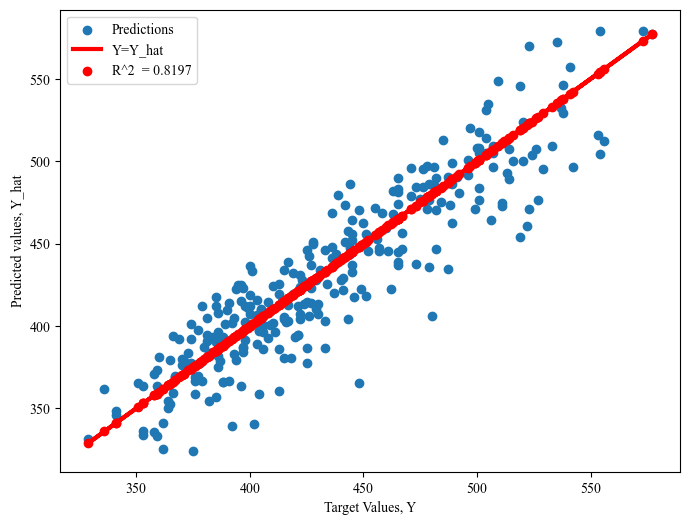

In [460]:
# Plot the accuracy
plt.figure(figsize=(8, 6))
r2 = r2_score(target_values, y_hat_)
print('r2: ', r2)
plt.scatter(target_values, y_hat_, label='Predictions')
plt.plot(target_values, target_values, color='red', linewidth = 3, label=f'Y=Y_hat')
plt.scatter(target_values, target_values, color='red', label=f'R^2  = {r2:.4f}')
plt.xlabel('Target Values, Y')
plt.ylabel('Predicted values, Y_hat')
plt.legend()
plt.show() 

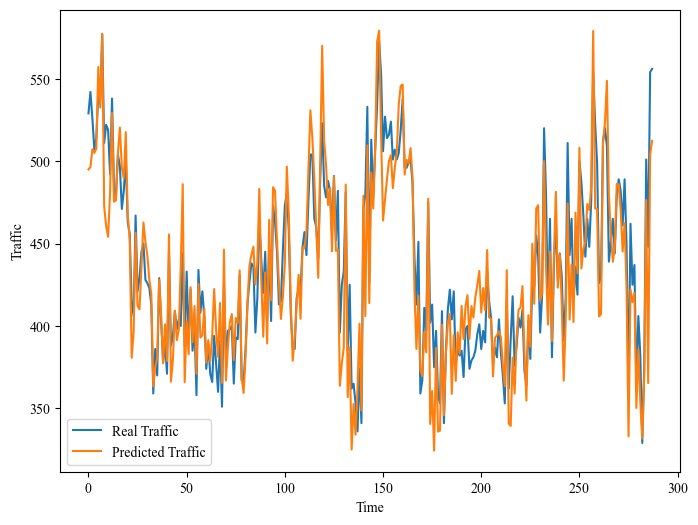

In [461]:
# Plot the traffic
plt.figure(figsize=(8, 6))
n = np.arange(len(target_values))

plt.plot(target_values, label='Real Traffic')
plt.plot(y_hat_, label='Predicted Traffic')

plt.xlabel('Time')
plt.ylabel('Traffic')
plt.legend()
plt.show()

In [34]:
import math

# Determine the grid size
num_weights = weights_over_time.shape[1]
grid_size = math.ceil(math.sqrt(num_weights))

# Create a grid of subplots, one for each weight
fig, axs = plt.subplots(grid_size, grid_size, figsize=(12*grid_size, 12*grid_size))

# Flatten the axs for easier iteration
axs_flat = axs.flatten()

# Define the polynomial terms
polynomial_terms = []
for i in range(polynomial_degree+1):
    for j in range(polynomial_degree+1):
        polynomial_terms.append(f'x1^{i} * x2^{j}')

for i in range(num_weights):
    axs_flat[i].plot(weights_over_time[:, i])
    axs_flat[i].set_title(f'Weight w{i} for ({polynomial_terms[i]})', fontweight='bold')
    axs_flat[i].set_xlabel('Timestep')
    axs_flat[i].set_ylabel('Weight value')
    axs_flat[i].legend()

# Remove empty subplots
if grid_size**2 > num_weights:
    for i in range(num_weights, grid_size**2):
        fig.delaxes(axs_flat[i])

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

IndexError: list index out of range